### Importing Modules

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import requests

#### Getting URL of web page

In [2]:
URL = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)' # Data is from wikipedia IMF(2025)

#### Data Extraction and Processing

In [3]:
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) "
                  "AppleWebKit/605.1.15 (KHTML, like Gecko) "
                  "Version/16.0 Safari/605.1.15"
}

response = requests.get(URL, headers=headers)

if response.status_code == 200:
    tables = pd.read_html(response.text)

/var/folders/s1/h7ws6gy96r3304rxmck9gwg00000gn/T/ipykernel_74756/3017868114.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


In [4]:
df = tables[2]
colNo = df.shape[1]
df.columns = range(colNo)
df = df[[0,1]]
df = df.iloc[1:11, :]
df.columns = ['Country', 'GDP (Million USD) By IMF']

In [5]:
df[['GDP (Million USD) By IMF']] = df[['GDP (Million USD) By IMF']].astype(int)

In [6]:
df[['GDP (Million USD) By IMF']] = df[['GDP (Million USD) By IMF']] / 1000

In [7]:
df[['GDP (Million USD) By IMF']] = np.round(df[['GDP (Million USD) By IMF']],2)

In [8]:
df_billion = df.rename(columns={'GDP (Million USD) By IMF' : 'GDP (Billion USD) By IMF'})

In [9]:
print(df_billion)
df_billion.to_csv('Largest_economies.csv')  # Writing results in csv file

           Country  GDP (Billion USD) By IMF
1    United States                  30507.22
2       China[n 1]                  19231.71
3          Germany                   4744.80
4            India                   4187.02
5            Japan                   4186.43
6   United Kingdom                   3839.18
7           France                   3211.29
8            Italy                   2422.86
9           Canada                   2225.34
10          Brazil                   2125.96


### Ploting Bar Graph For Top 10 Countries by GDP

In [10]:
countries = np.array(df_billion['Country'])
gdp = np.array(df_billion['GDP (Billion USD) By IMF'])

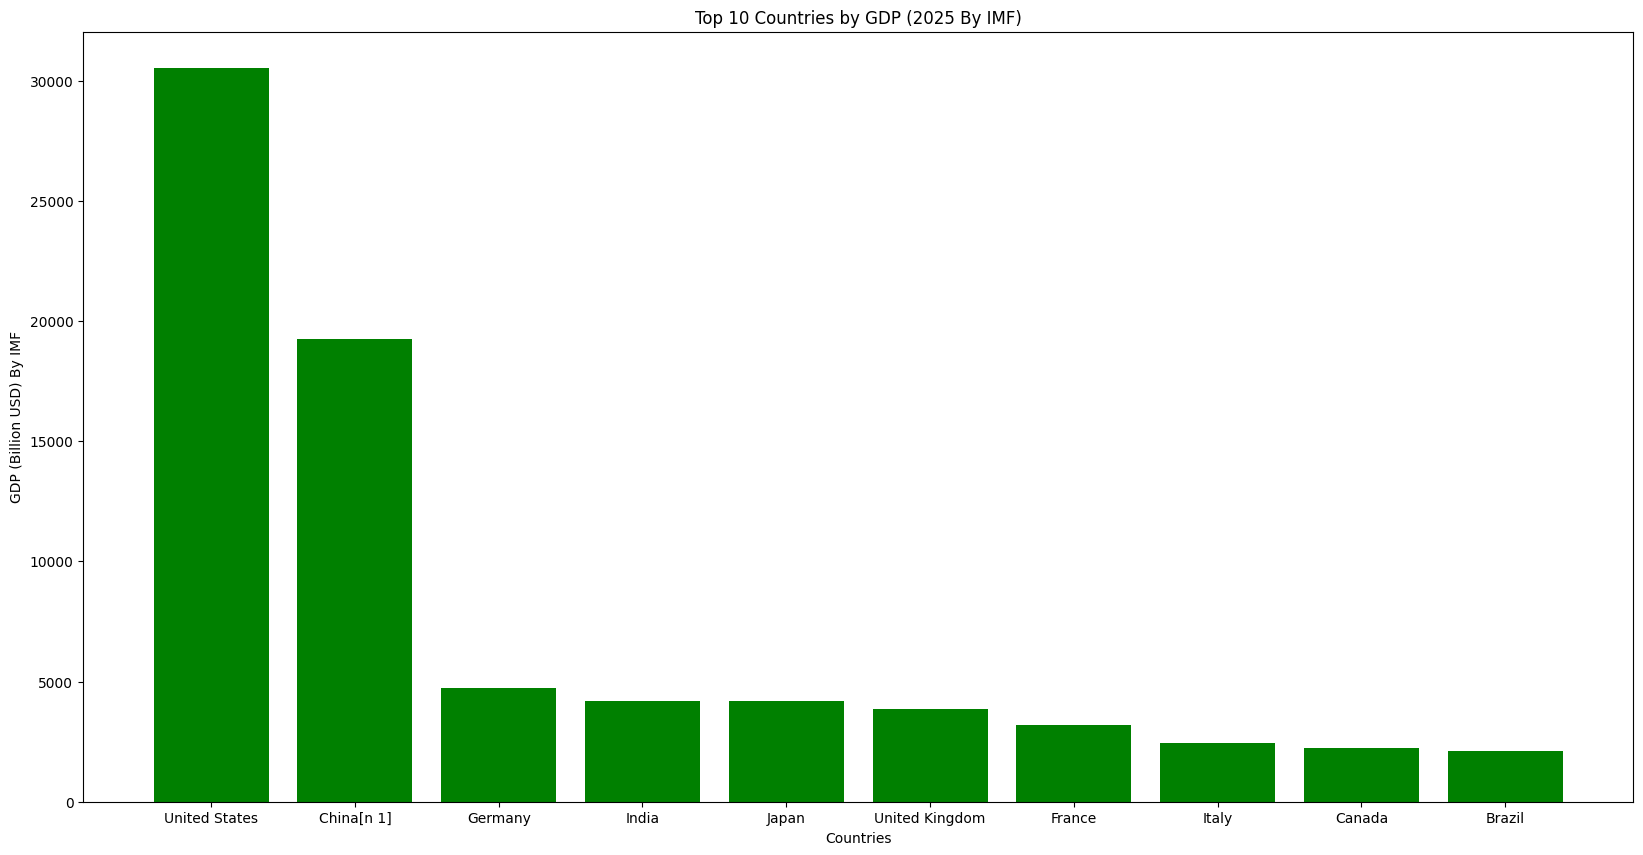

In [11]:
plt.figure(figsize=(20,10))
plt.title('Top 10 Countries by GDP (2025 By IMF)')
plt.xlabel('Countries')
plt.ylabel('GDP (Billion USD) By IMF')
plt.bar(countries, gdp, color='green')

plt.savefig('gdp_bar_plot.png')
plt.show()